#### 1. 비정형 데이터 _ 빈도분석

COUNTER 연습

In [33]:
Counter는 리스트의 구성요소를 종류별로 빈도 계산한다
from collections import Counter
count = Counter(["준혁","지민","준혁","지민","규동"])
result = count.most_common(2) #상위 결과 2개만 보여주세요
#result = count.most_common() 의 결과는 [('준혁', 2), ('지민', 2), ('규동', 1)] 임 그 중에 2개이므로 규동을 뺌

print(count)
print(result)
print(result[0])
print(result[0][0]) #0번째 요소의 0번째
print(result[0][1])

Counter({'준혁': 2, '지민': 2, '규동': 1})
[('준혁', 2), ('지민', 2)]
('준혁', 2)
준혁
2


sorted 연습

In [54]:
sample = {'준혁':1, '지민':2, '규동':3} # sorted 함수는 딕셔너리 객체를 받아서 정렬할 수 있
#결과는 다 똑같음
print(sorted(sample))
print(sorted(sample, reverse=True)) #역순으로 정렬
print(sorted(sample, key=sample.get, reverse=True)) # sample.get의 출력된 값을 기준으로 sample 내림차순 정렬

sorted(sample.values(), reverse=True) #값 부분만 출력하여 정렬함

['규동', '준혁', '지민']
['지민', '준혁', '규동']
['규동', '지민', '준혁']


[3, 2, 1]

bar 그래프 연습, 폰트 설정

([<matplotlib.axis.XTick at 0x1e5e9974488>,
 [Text(0, 0, '규동'), Text(0, 0, '지민'), Text(0, 0, '준혁')])

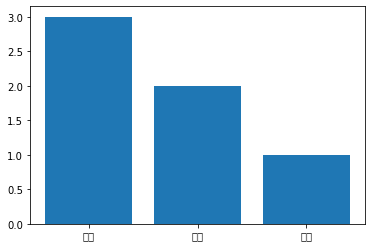

In [56]:
a = Counter({'준혁':1, '지민':2,'규동':3})
sorted_keys_sample = sorted(a, key = a.get, reverse=True)
sorted_values_sample = sorted(a.values(),reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(a)), sorted_values_sample) #x축의 위치, x의 높이
plt.xticks(range(len(a)), list(sorted_keys_sample)) #x축의 위치, 각 x의 라벨



1. 데이터 로딩

In [ ]:
import os
import time

#start = time.time()
os.chdir("C:/pytest")

# import pandas as pd
# data = pd.read_csv('ratings.txt', delimiter='\t', keep_default_na=False, encoding='cp949')  # 또는 utf8

def read_data(filename):                # 읽기 함수 정의
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]                 # txt 파일의 헤더(id document label)는 제외하기
    return data

def write_data(data, filename):         # 쓰기 함수 정의
    with open(filename, 'w') as f:
        f.write(data)

data = read_data('ratings.txt')         # 연습파일은 ratings_small.txt  0은 부정, 1은 긍정
print(len(data))                        # 200,000
print(len(data[0]))                     # 3개의 컬럼으로 나뉘어 있다


2. 문장 형태소 분석

In [ ]:
#50분 걸림 돌리지마
# 전체 문장 형태소 분석
# 형태소 분석기 기동
import rhinoMorph
rn = rhinoMorph.startRhino()
morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    joined_data_each = ' '.join(morphed_data_each)                                  # 문자열을 하나로 연결
    if joined_data_each:                                                            # 내용이 있는 경우만 저장함
        morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"

# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt')

#end = time.time()
#print("Elapsed Time:", end - start)                                 # 3047.095737695694. 약 50분


3. 전체 데이터 그래프

In [28]:
from collections import Counter
data_text = open('c:/pytest/ratings_morphed.txt','r') # 텍스트 형식으로 파일을읽음
data_text = data_text.readlines()

data_text_freq = Counter(data_text) # 각줄이 하나의 종류로 카운트
#print('data_text_Freq:',data_text_freq) 
mergedText = ' '.join(data_text) # 공백 단위로 리스트 요소들를 결합

mergedTextList = mergedText.split(' ') # 문자열을 공백 단위로 나눠 리스트로 만듬

wordInfo = Counter(mergedTextList)

([<matplotlib.axis.XTick at 0x1e5e09c5e08>,
  ...],
 [Text(0, 0, '영화'),
  Text(0, 0, '하'),
  Text(0, 0, '보'),
  Text(0, 0, '없'),
  Text(0, 0, '너무'),
  Text(0, 0, '되'),
  Text(0, 0, '좋'),
  Text(0, 0, '재미있'),
  Text(0, 0, '영화\t1\n'),
  Text(0, 0, '정말'),
  Text(0, 0, '연기'),
  Text(0, 0, '같'),
  Text(0, 0, '다'),
  Text(0, 0, '영화\t0\n'),
  Text(0, 0, '만들'),
  Text(0, 0, '말'),
  Text(0, 0, '나오'),
  Text(0, 0, '진짜'),
  Text(0, 0, '안'),
  Text(0, 0, '때'),
  Text(0, 0, '알'),
  Text(0, 0, '잘'),
  Text(0, 0, '더'),
  Text(0, 0, '들'),
  Text(0, 0, '왜'),
  Text(0, 0, '사람'),
  Text(0, 0, '평점'),
  Text(0, 0, '스토리'),
  Text(0, 0, '만'),
  Text(0, 0, '배우'),
  Text(0, 0, '주'),
  Text(0, 0, '이'),
  Text(0, 0, '가'),
  Text(0, 0, '생각'),
  Text(0, 0, '하\t0\n'),
  Text(0, 0, '이런'),
  Text(0, 0, '드라마'),
  Text(0, 0, '최고'),
  Text(0, 0, '좀'),
  Text(0, 0, '감동'),
  Text(0, 0, 'ㅋㅋㅋ'),
  Text(0, 0, '내용'),
  Text(0, 0, '하\t1\n'),
  Text(0, 0, '감독'),
  Text(0, 0, '없\t0\n'),
  Text(0, 0, '수'),
  Text(0, 0, '지루'),
  T

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47960 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51667 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50715 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48737 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45806 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44622 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51673 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48261 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51670 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44866 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44058 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50661 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47949 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51110 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50686 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52873 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53571 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50695 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55100 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45832 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packag

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44316 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52270 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49453 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12641 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50644 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46028 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50633 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46496 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44361 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47680 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54861 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48624 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52644 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50424 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45823 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12601 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53448 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54411 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44202 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47751 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52285 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51804 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49800 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53597 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49905 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47805 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52392 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50641 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45589 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12614 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50521 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12631 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44555 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45257 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52412 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52393 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54189 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44484 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51908 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53304 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50621 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52180 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52789 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53416 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49940 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45656 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55195 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44751 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49632 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44901 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47587 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50276 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54212 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54144 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55197 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55129 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51018 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44753 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46616 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49808 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47212 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46904 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49483 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45040 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44999 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49891 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49695 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54044 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45188 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53820 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49317 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44816 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53569 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51928 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46991 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54772 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47729 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53571 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50417 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50695 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49711 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49788 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54187 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50360 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49668 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55100 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53112 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52283 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51244 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45033 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52684 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45832 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49705 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48309 missing from current font.
  font.set_text(s, 0, flags=flags)


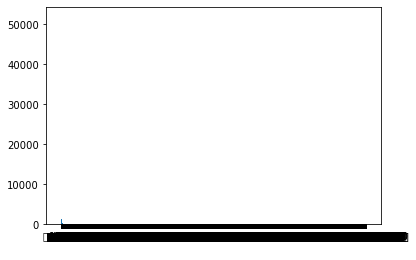

In [14]:
# 시간 오래 걸림
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(x=range(len(wordInfo)),height = sorted_values)
plt.xticks(range(len(wordInfo)), list(sorted_keys))

4, 그래프를 그릴 일부 데이터만 다시 출력

([<matplotlib.axis.XTick at 0x1e5ecbe6308>,
 [Text(0, 0, '영화'),
  Text(0, 0, '하'),
  Text(0, 0, '보'),
  Text(0, 0, '없'),
  Text(0, 0, '너무'),
  Text(0, 0, '되'),
  Text(0, 0, '좋'),
  Text(0, 0, '재미있'),
  Text(0, 0, '영화\t1\n'),
  Text(0, 0, '정말'),
  Text(0, 0, '연기'),
  Text(0, 0, '같'),
  Text(0, 0, '다'),
  Text(0, 0, '영화\t0\n'),
  Text(0, 0, '만들'),
  Text(0, 0, '말'),
  Text(0, 0, '나오'),
  Text(0, 0, '진짜'),
  Text(0, 0, '안'),
  Text(0, 0, '때')])

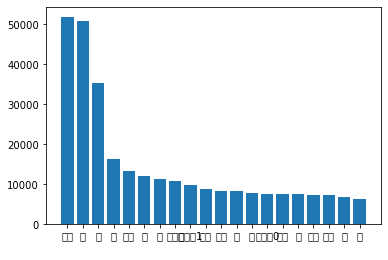

In [29]:
# 앞에서부터 20개만 출력한다
import matplotlib.pyplot as plt
plt.bar(x=range(20), height = sorted_values[:20])
plt.xticks(range(20), list(sorted_keys[:20]))

5. wordcloud 그림

In [22]:
import pytagcloud

In [27]:
#그 전에 3개 깔기
import pytagcloud

taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)

pytagcloud.create_tag_image(taglist[:100],"test01.jpg", size=(540,480),
                           fontname='Korean', rectangular=False)
# 앞의 100개만 그리고 test01로 저장됨
#파일 크기 540*480
#korean 폰트 사용
#사각형으로 만들지 않기로 함

### 감성분석

#### 2. 사전을 이용한 감성분석

(1) 늘하던 데이터 로딩

In [30]:
import os

# 데이터 로딩
os.chdir("C:/pytest")

def read_data(filename):
    with open(filename, 'r', encoding="cp949") as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]                 # txt 파일의 헤더(id document label)는 제외하기
    return data

data = read_data('ratings_morphed.txt')         # 1은 긍정, 0은 부정
print(len(data))                                # 197406 (200,000에서 일부는 자료가 남지 않아 제외 되었음)
print(len(data[0]))                             # 3개의 컬럼으로 나뉘어 있다


197402
3


(2) 감성사전 읽기

In [31]:
# 데이터 분리
data_id = [line[0] for line in data]        # 데이터 id
data_text = [line[1] for line in data]      # 데이터 본문


data_senti = [line[2] for line in data]     # 데이터 긍부정 부분
# 감성사전 읽기
positive = read_data('positive.txt')
negative = read_data('negative.txt')

pos_found = []
neg_found = []

(3) 감성단어 파악

In [32]:

def cntWordInLine(data, senti):
    senti_found = []
    for onedata in data:
        oneline_word = onedata.split(' ')           # 읽은 한 줄의 데이터를 공백 단위로 분리하여 리스트로 저장
        senti_temp = 0
        for sentiword in senti:
            if sentiword[0] in oneline_word:        # posword[0] 하여 리스트를 문자열로 추출
                senti_temp += 1                     # 현재의 감정단어와 일치하면 숫자를 하나 올려 줌
        senti_found.append(senti_temp)              # 현재의 줄에서 찾은 감성단어의 숫자를 해당 위치에 저장
    return senti_found


data_senti_poscnt = cntWordInLine(data_text, positive)      # 발견된 긍정 단어의 숫자 파악
data_senti_negcnt = cntWordInLine(data_text, negative)      # 발견된 부정 단어의 숫자 파악


data_senti_negcnt[:10]

[1, 0, 1, 0, 0, 0, 2, 0, 0, 0]

(4) 감성점수 계산

In [33]:
# Pandas 데이터프레임으로 저장
import pandas as pd
newdata = pd.DataFrame({'id':data_id, 'text':data_text, 'original':data_senti, 'pos':data_senti_poscnt, 'neg':data_senti_negcnt})
senti_score = newdata['pos'] - newdata['neg']      # 긍정개수에서 부정개수를 뺌
newdata['senti_score'] = senti_score               # 그 수를 senti_score 컬럼에 저장

newdata.loc[newdata.senti_score > 0, 'new'] = 1    # 새로운 긍정 기호
newdata.loc[newdata.senti_score <= 0, 'new'] = 0   # 새로운 긍정 기호

# 처음에 기록된 긍부정과 새로 계산된 긍부정이 같은지 여부를 matched 컬럼에 저장
# original 컬럼은 문자로 되어 있으므로 숫자로 변환 뒤 비교
newdata.loc[pd.to_numeric(newdata.original) == newdata.new, 'matched'] = 'True'
newdata.loc[pd.to_numeric(newdata.original) != newdata.new, 'matched'] = 'False'

#원점수와 비교 및 저장(csv파일, txt파일 저장)
newdata.matched.str.count('True').sum() / (newdata.matched.str.count('True').sum() + newdata.matched.str.count('False').sum()) * 100
newdata.to_csv('newfile.csv',sep=',', encoding='cp949', index=False)
newdata.to_txt('newfile2.txt',sep='\t', encoding='cp949', index=False)


시그모이드 점수 계산

In [58]:
#시그모이드 함수는 모든 값을 0~1 사이로 변경해준다
# 따라서 단어들의 극성이 한쪽으로 몰려도 값을 정규화하는 효과가 있다
# 결과값을 시그모이드 값으로 변환하여 'sigmoid' 컬럼에 저장하기
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

newdata['sigmoid'] = newdata.new.apply(sigmoid)

print(newdata)


              id                                               text original  \
0        8132799  디자인 배우 학생 외국 디자이너 와 일구 전통 통하 발전 문화 산업 부럽 사실 우리...        1   
1        4655635                                  폴리스스토리 시리즈 뉴 없 최고        1   
2        9251303                  와 연기 진짜 쩔 지루 생각하 몰입 하 그래 이런 진짜 영화        1   
3       10067386                               안개 자욱 밤하늘 뜨 초승달 같 영화        1   
4        2190435                                 사랑 해보 사람 처음 끝 웃 영화        1   
...          ...                                                ...      ...   
197397   8963373                                        포켓 몬스터 짜 ㅡㅡ        0   
197398   3302770                                              쓰 레 기        0   
197399   5458175                     완전 사이코 영화 마지막 더욱더 이 영화 의 떨 트 린        0   
197400   6908648                     왜 날 재미없 ㅠㅠ 라 따 뚜 보 스머프 보 그렇 ㅋㅋ        0   
197401   8548411                                        포 풍 저그 신 영차        0   

        pos  neg  senti_score  new matc

#### 3. 머신러닝 알고리즘을 이용한 감성분석

(1) 무튼 또 형태 분석된 데이터 로딩

In [36]:
import os

# 데이터 로딩
os.chdir("C:/pytest")

def read_data(filename):
    with open(filename, 'r', encoding="cp949") as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]                 # txt 파일의 헤더(id document label)는 제외하기
    return data

data = read_data('ratings_morphed.txt')         # 1은 긍정, 0은 부정
print(len(data))                                # 197406 (200,000에서 일부는 자료가 남지 않아 제외 되었음)
print(len(data[0]))                             # 3개의 컬럼으로 나뉘어 있다

197402
3


(2) 머신러닝 알고리즘을 이용한다 했으니 훈련 데이터와 테스트 데이터 분석

In [37]:

data_id = [line[0] for line in data]       		# 데이터 id
data_text = [line[1] for line in data]          # 데이터 본문
data_senti = [line[2] for line in data]         # 데이터 긍부정 부분

from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify=data_senti)

from collections import Counter             # Counter 클래스를 이용해 각 분류가 훈련데이터와 테스트데이터에 같은 비율로 들어갔는지 확인해 본다
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)

train_data_senti_freq: Counter({'1': 74032, '0': 74019})
test_data_senti_freq: Counter({'1': 24678, '0': 24673})


(3)행렬 형태로 변환 및 관찰

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5).fit(train_data_text) # 빈도 5이상
X_train = vect.transform(train_data_text) # 생성된 행렬 개요
print("X_train:\n", repr(X_train)) 
# vect.transform(train_data_text).toarray() # 희소 행렬(대부분 0)임을 알 수 있다

feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\m", feature_names[:20])
print("3000~5000까지의 특성:\n", feature_names[3000:5000])


X_train:
 <148051x11257 sparse matrix of type '<class 'numpy.int64'>'
	with 816562 stored elements in Compressed Sparse Row format>
특성 개수: 11257
처음 20개 특성:\m ['cgv', 'ebs', 'kbs', 'mb', 'mbc', 'sbs', 'ㄴㄴ', 'ㄷㄷ', 'ㅁㅈㅎ', 'ㅂㅅ', 'ㅅㅂ', 'ㅇㅇ', 'ㅇㅇㅇ', 'ㅈㅈ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅎㅎㅎㅎ', 'ㅜㅜ']
3000~5000까지의 특성:
 ['마이어스', '마이크', '마이클', '마인드', '마일', '마일리지', '마저', '마주', '마주치', '마중', '마지', '마지막', '마직', '마징가', '마찬가지', '마초', '마츠야마', '마치', '마침', '마침표', '마케팅', '마코토', '마크', '마키', '마테오', '마트', '마틴', '마피아', '마하', '막가', '막걸리', '막내', '막대', '막론', '막막', '막말', '막무가내', '막바지', '막상', '막스', '막연', '막장', '막지', '막판', '막히', '만그', '만끽', '만나', '만날', '만남', '만내', '만능', '만담', '만두', '만들', '만들수', '만듦새', '만땅', '만만', '만만세', '만발', '만보', '만사', '만세', '만약', '만인', '만점', '만족', '만족감', '만주', '만지', '만찬', '만하', '만해', '만행', '만화', '만화가', '만화책', '만회', '많이', '말기', '말길', '말년', '말랑말랑', '말로', '말론', '말리', '말미', '말살', '말세', '말씀', '말아먹', '말없이', '말장난', '말종', '말초', '말코비치', '말콤', '말타', '말투', '말하', '말하기', '말해', '맘껏', '맘대로', '맘마', '맘마미아', '맘속', '맙소

(4)머신러닝 알고리즘 적용

In [39]:
# 로지스틱 회귀분석 적용
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
y_train = pd.Series(train_data_senti)
scores = cross_val_score(LogisticRegression(solver="liblinear"), X_train, y_train, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 점수 평균:', scores.mean())


교차 검증 점수: [0.80264091 0.80621412 0.80033772 0.80236407 0.80496454]
교차 검증 점수 평균: 0.8033042712535596


그리드 서치를 통한 최적 매개변수 찾기

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 3, 5]} #파라미터 적절한거 찾아줌
grid = GridSearchCV(LogisticRegression(solver="liblinear"), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최고 교차 검증 점수:", round(grid.best_score_, 3))
print("최적의 매개변수:", grid.best_params_)


최고 교차 검증 점수: 0.803
최적의 매개변수: {'C': 1}


테스트 데이터 입력

In [41]:
# 테스트 데이터 적용
X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print("테스트 데이터 점수:", grid.score(X_test, y_test))

테스트 데이터 점수: 0.8033677129136187


1개 데이터 예측

In [43]:
import rhinoMorph
rn = rhinoMorph.startRhino()
new_input = '오늘은 정말 재미있는 하루구나!'

# 입력 데이터 형태소 분석하기
inputdata = []
morphed_input = rhinoMorph.onlyMorph_list(rn, new_input, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
morphed_input = ' '.join(morphed_input) # 한 개의 문자열로 만들기

inputdata.append(morphed_input)         # 분석 결과를 리스트로 만들기
print('input data:', inputdata)         # 확인

X_input = vect.transform(inputdata)
result = grid.predict(X_input)            # 0은 부정,1은 긍정

if result == 0:
    print("부정적인 글입니다")
else:
    print("긍정적인 글입니다")

filepath:  C:\anaconda3\lib\site-packages
classpath:  C:\anaconda3\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
input data: ['오늘 정말 재미있 하루']
긍정적인 글입니다


TF-IDF를 이용한 모델 구성

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vect = TfidfVectorizer(min_df=5).fit(train_data_text)
X_train = vect.transform(train_data_text)
print("X_train:\n", repr(X_train))

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
y_train = pd.Series(train_data_senti)
scores = cross_val_score(LogisticRegression(solver="liblinear"), X_train, y_train, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 점수 평균:', scores.mean())


X_train:
 <148051x11257 sparse matrix of type '<class 'numpy.float64'>'
	with 816562 stored elements in Compressed Sparse Row format>
교차 검증 점수: [0.80709871 0.8112462  0.80442418 0.80543735 0.80847687]
교차 검증 점수 평균: 0.8073366626226728


TF-IDF를 이용한 덜 중요한 단어 찾기

In [60]:
ascend_idf = np.argsort(vect.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[ascend_idf[:100]])           
 # 모든 문서에서 자주 나타나서 덜 중요한 단어들
ascend_idf = np.argsort(vect.idf_)
print("가장 높은 idf를 가진 특성:\n", feature_names[ascend_idf[::-1]])
descend_idf = ascend_idf[::-1]
print("가장 높은 idf를 가진 특성 100:\n", feature_names[descend_idf[:100]])


TypeError: only integer scalar arrays can be converted to a scalar index

사용된 형태소 구하기

In [61]:
### 사용된 형태소 구하기
voca = vect.vocabulary_
print(voca)
type(voca)          # dict

# 컬럼 번호로 정렬하기
s = [(k, voca[k]) for k in sorted(voca, key=voca.get, reverse=False)]
for k, v in s:
    print(k, v)

{'아이': 5991, '좋아하': 8725, '하지만': 10519, '어른': 6323, '공감': 697, '사귀': 4634, '아쉽': 5964, '요즘': 7051, '애니메이션': 6190, '그런': 1036, '나오': 1555, '너무': 1726, '어렵': 6320, 'ㅎㅎ': 16, '필요': 10448, '세계관': 5096, '이해': 7751, '재미있': 8195, '근데': 1116, '러브': 2750, '라인': 2730, 'ㅋㅋㅋ': 15, '애니': 6188, '극장판': 1105, '그딴': 1015, '흑흑': 11180, '작가': 8047, '왕따': 6979, '만들': 3054, '원작자': 7207, '대우': 2155, '안되': 6085, '그냥': 1006, '재미': 8192, '단지': 2039, '특이': 10044, '소재': 5207, '못살': 3441, '작품': 8064, '고전': 656, '뮤지컬': 3603, '강추': 282, '성장': 5075, '영화': 6745, '교과서': 854, '베스트': 4097, '오랜만': 6834, 'ㅋㅋ': 14, '이런': 7573, '시간': 5558, '차리': 9200, '길거리': 1278, '똥개': 2671, '지나': 8919, '지금': 8912, '바로': 3749, '꼬마': 1430, '지루': 8942, '티비': 10061, '아깝': 5893, '나이': 1558, '재미없': 8194, '조지': 8662, '클루니': 9776, '그때': 1016, '빨리': 4595, '끝나': 1493, '아침': 6030, '드라마': 2520, '계시': 558, '의도': 7472, '생각': 4868, '심형래': 5814, '비하': 4543, '떨어지': 2652, '정식': 8473, '인정': 7818, '주저': 8798, '포스터': 10266, '보이': 4203, '그래픽': 1023, '실제': 5765

경향 546
경험 547
곁들이 548
계급 549
계기 550
계단 551
계몽 552
계보 553
계산 554
계상 555
계속 556
계승 557
계시 558
계약 559
계자 560
계절 561
계집 562
계층 563
계획 564
고가 565
고갈 566
고개 567
고결 568
고경표 569
고고 570
고교 571
고구마 572
고군분투 573
고귀 574
고급 575
고기 576
고난 577
고뇌 578
고단 579
고달프 580
고대 581
고대로 582
고도 583
고독 584
고독감 585
고든 586
고등 587
고등학교 588
고등학생 589
고딕 590
고딩 591
고래 592
고래고래 593
고려 594
고령 595
고로 596
고루 597
고르 598
고리 599
고리타분 600
고릴라 601
고립 602
고마 603
고마움 604
고만 605
고만고만 606
고맙 607
고모 608
고무 609
고문 610
고민 611
고발 612
고백 613
고보 614
고봉 615
고비 616
고삐리 617
고사 618
고사하고 619
고상 620
고생 621
고소 622
고소영 623
고수 624
고스 625
고스란히 626
고스톱 627
고스트 628
고슬링 629
고시 630
고십 631
고아 632
고아라 633
고아원 634
고안 635
고약 636
고양 637
고양이 638
고어 639
고역 640
고요 641
고용 642
고우 643
고위 644
고유 645
고은 646
고은아 647
고의 648
고이 649
고인 650
고잉 651
고자 652
고작 653
고장 654
고저 655
고전 656
고정 657
고정관념 658
고조 659
고준희 660
고증 661
고지 662
고지식 663
고질 664
고질라 665
고집 666
고찰 667
고창 668
고창석 669
고추 670
고치 671
고통 672
고풍 673
고프 674
고하 675
고한 676
고함 677
고해 678
고향 679
고현정 680
고혹 681
고흐 682
곤

당첨 2091
당최 2092
당하 2093
당혹 2094
당황 2095
대가 2096
대가리 2097
대갈 2098
대강 2099
대개 2100
대게 2101
대견 2102
대결 2103
대구 2104
대국민 2105
대나무 2106
대남 2107
대놓고 2108
대니보일 2109
대다수 2110
대단 2111
대단히 2112
대담 2113
대답 2114
대대 2115
대딩 2116
대략 2117
대량 2118
대런 2119
대령 2120
대로 2121
대륙 2122
대리 2123
대립 2124
대만 2125
대머리 2126
대면 2127
대명사 2128
대박 2129
대반 2130
대변 2131
대보 2132
대본 2133
대부 2134
대부분 2135
대비 2136
대사 2137
대사관 2138
대사들 2139
대상 2140
대선 2141
대성 2142
대성통곡 2143
대세 2144
대수 2145
대신 2146
대실 2147
대안 2148
대여 2149
대여비 2150
대여점 2151
대역 2152
대열 2153
대왕 2154
대우 2155
대원 2156
대위 2157
대응 2158
대의 2159
대인 2160
대일 2161
대입 2162
대작 2163
대장 2164
대장금 2165
대적 2166
대전 2167
대접 2168
대조 2169
대조영 2170
대중 2171
대책 2172
대처 2173
대체 2174
대체로 2175
대출 2176
대충 2177
대충대충 2178
대통령 2179
대포 2180
대표 2181
대표작 2182
대풍 2183
대하 2184
대하드라마 2185
대학 2186
대학교 2187
대학생 2188
대한민국 2189
대항 2190
대형 2191
대화 2192
대회 2193
댄서 2194
댄스 2195
댄싱 2196
댓가 2197
댓글 2198
댕기 2199
더구나 2200
더군다나 2201
더글라스 2202
더더 2203
더더더 2204
더더욱 2205
더듬 2206
더디 2207
더러 2208
더러움 2209
더러워지 2210

명백 3315
명복 3316
명분 3317
명색 3318
명성 3319
명심 3320
명언 3321
명연 3322
명연기 3323
명예 3324
명우 3325
명인 3326
명작 3327
명장 3328
명장면 3329
명절 3330
명치 3331
명쾌 3332
명탐정 3333
명품 3334
명함 3335
명화 3336
명확 3337
명확히 3338
몇몇 3339
몇일 3340
모가지 3341
모건 3342
모기 3343
모녀 3344
모니 3345
모니카 3346
모니터 3347
모던 3348
모델 3349
모독 3350
모두 3351
모드 3352
모든 3353
모라 3354
모래 3355
모래시계 3356
모레 3357
모로 3358
모르 3359
모리 3360
모방 3361
모범 3362
모성 3363
모성애 3364
모세 3365
모션 3366
모순 3367
모스 3368
모습 3369
모시 3370
모야 3371
모양 3372
모양새 3373
모어 3374
모욕 3375
모욕감 3376
모으 3377
모음집 3378
모이 3379
모임 3380
모자 3381
모자라 3382
모자람 3383
모자르 3384
모자이크 3385
모조리 3386
모지 3387
모짜르트 3388
모차르트 3389
모처럼 3390
모태 3391
모텔 3392
모토 3393
모티브 3394
모험 3395
모호 3396
모히칸 3397
목걸이 3398
목격 3399
목록 3400
목마르 3401
목사 3402
목소리 3403
목숨 3404
목요일 3405
목욕 3406
목욕탕 3407
목적 3408
목표 3409
몬스터 3410
몰두 3411
몰라보 3412
몰락 3413
몰래 3414
몰려오 3415
몰르 3416
몰리 3417
몰살 3418
몰상식 3419
몰아 3420
몰아가 3421
몰아넣 3422
몰아주 3423
몰아치 3424
몰이 3425
몰입 3426
몰입감 3427
몰입도 3428
몰카 3429
몸매 3430
몸부림 3431
몸부림치 3432
몸소 3433
몸짓 3

분야 4375
분열 4376
분열증 4377
분위 4378
분위기 4379
분임 4380
분장 4381
분전 4382
분통 4383
분투 4384
분하 4385
불가 4386
불가능 4387
불가사의 4388
불감증 4389
불과 4390
불교 4391
불구 4392
불꽃 4393
불능 4394
불량 4395
불러내 4396
불러오 4397
불러일으키 4398
불륜 4399
불리 4400
불리우 4401
불만 4402
불면 4403
불면증 4404
불멸 4405
불명 4406
불문 4407
불법 4408
불복 4409
불사 4410
불사신 4411
불사조 4412
불상 4413
불신 4414
불쌍 4415
불안 4416
불안감 4417
불우 4418
불운 4419
불의 4420
불치병 4421
불쾌 4422
불쾌감 4423
불타 4424
불태우 4425
불편 4426
불평 4427
불행 4428
불허 4429
불협화음 4430
불후 4431
붉은 4432
붕괴 4433
붕대 4434
붕붕 4435
붙이 4436
붙잡 4437
뷰티 4438
뷰티풀 4439
브라더스 4440
브라보 4441
브라스 4442
브라운 4443
브라운관 4444
브라이언 4445
브라질 4446
브란도 4447
브래드 4448
브랜드 4449
브레드 4450
브레이크 4451
브렌든 4452
브로드웨이 4453
브로스넌 4454
브로큰 4455
브루스 4456
브룩 4457
브리 4458
브리지스 4459
브리짓 4460
브리트니 4461
브이 4462
블라인드 4463
블랑 4464
블랙 4465
블랙리스트 4466
블랙홀 4467
블러드 4468
블럭 4469
블레어 4470
블레이드 4471
블로그 4472
블록 4473
블록버스터 4474
블루 4475
블루스 4476
블룸 4477
비겁 4478
비견 4479
비공 4480
비교 4481
비교적 4482
비극 4483
비꼬 4484
비난 4485
비노쉬 4486
비단 4487
비도 4488
비둘기 4489
비디 4490
비디오

스패로우 5506
스펀지 5507
스페셜 5508
스페이스 5509
스페이시 5510
스페인 5511
스페인어 5512
스펙터클 5513
스펙트럼 5514
스포 5515
스포츠 5516
스폰 5517
스폰서 5518
스폰지 5519
스푼 5520
스프 5521
스피드 5522
스피디 5523
스피릿 5524
스피커 5525
스필버그 5526
슬기 5527
슬래셔 5528
슬램덩크 5529
슬랩스틱 5530
슬럼프 5531
슬레이터 5532
슬로 5533
슬로우 5534
슬립 5535
슬슬 5536
슬퍼지 5537
슬퍼하 5538
슬프 5539
슬픔 5540
습격 5541
습관 5542
습작 5543
승기 5544
승리 5545
승리자 5546
승부 5547
승승장구 5548
승우 5549
승원 5550
승자 5551
승질 5552
승천 5553
승화 5554
시가 5555
시가전 5556
시각 5557
시간 5558
시간대 5559
시갈 5560
시걸 5561
시계 5562
시고니 5563
시골 5564
시공 5565
시궁창 5566
시급 5567
시기 5568
시끄럽 5569
시끌벅적 5570
시나리오 5571
시내 5572
시너지 5573
시네 5574
시네마 5575
시노부 5576
시놉시스 5577
시니컬 5578
시달리 5579
시답잖 5580
시대 5581
시대극 5582
시대상 5583
시대인 5584
시대착오 5585
시덥 5586
시덥잖 5587
시도 5588
시드 5589
시들 5590
시디 5591
시라 5592
시라노 5593
시력 5594
시련 5595
시름 5596
시리 5597
시리즈 5598
시리즈물 5599
시릴 5600
시마 5601
시민 5602
시바 5603
시방 5604
시보 5605
시비 5606
시사 5607
시사회 5608
시상식 5609
시선 5610
시설 5611
시스템 5612
시시 5613
시시껄렁 5614
시신 5615
시아 5616
시아버지 5617
시야 5618
시어머니 5619
시연 5620
시영 562

오랜만 6834
오랫동안 6835
오랫만 6836
오렌지 6837
오로 6838
오로라 6839
오로지 6840
오류 6841
오르 6842
오르가즘 6843
오른 6844
오른쪽 6845
오름 6846
오리 6847
오리엔탈리즘 6848
오리지날 6849
오리지널 6850
오마이갓 6851
오마주 6852
오만 6853
오맹 6854
오멘 6855
오묘 6856
오바 6857
오바이트 6858
오버 6859
오버랩 6860
오브 6861
오빠 6862
오사 6863
오산 6864
오세 6865
오션스 6866
오수 6867
오스카 6868
오스틴 6869
오시이 6870
오싹 6871
오아시스 6872
오언 6873
오연 6874
오열 6875
오염 6876
오예 6877
오오 6878
오오오 6879
오우 6880
오우삼 6881
오웬 6882
오인 6883
오인혜 6884
오전 6885
오점 6886
오정 6887
오죽 6888
오줌 6889
오즈 6890
오지랖 6891
오지호 6892
오직 6893
오진 6894
오징어 6895
오차 6896
오컬트 6897
오케스트라 6898
오케이 6899
오크 6900
오타 6901
오토 6902
오토바이 6903
오페라 6904
오프 6905
오프닝 6906
오픈 6907
오피스 6908
오해 6909
오현 6910
오현민 6911
오형 6912
오호 6913
오후 6914
옥보단 6915
옥상 6916
옥수수 6917
옥한흠 6918
온갖 6919
온건 6920
온난 6921
온도 6922
온라인 6923
온리 6924
온몸 6925
온전히 6926
온통 6927
올가 6928
올드 6929
올라가 6930
올라서 6931
올라오 6932
올레 6933
올려놓 6934
올리 6935
올리버 6936
올리비아 6937
올림 6938
올림픽 6939
올바르 6940
올여름 6941
올인 6942
올해 6943
옮기 6944
옳지 6945
옴니버스 6946
옴니버스식 6947
옹호 6948
와닿 6949
와서 69

재미없 8194
재미있 8195
재미지 8196
재민 8197
재밌 8198
재밌게 8199
재발 8200
재방 8201
재벌 8202
재산 8203
재생 8204
재수 8205
재앙 8206
재연 8207
재영 8208
재원 8209
재인 8210
재일 8211
재정 8212
재주 8213
재중 8214
재즈 8215
재치 8216
재키 8217
재탕 8218
재판 8219
재현 8220
재회 8221
재훈 8222
잭맨 8223
잭슨 8224
쟁쟁 8225
쟁취 8226
쟈니 8227
저가 8228
저격 8229
저격수 8230
저그 8231
저급 8232
저냥 8233
저널리스트 8234
저녁 8235
저능아 8236
저당 8237
저도 8238
저래 8239
저러 8240
저럭 8241
저런 8242
저렇 8243
저력 8244
저렴 8245
저리 8246
저리하 8247
저릿저릿 8248
저만 8249
저미 8250
저버리 8251
저번 8252
저상 8253
저속 8254
저수지 8255
저스틴 8256
저울 8257
저의 8258
저장 8259
저절로 8260
저조 8261
저주 8262
저지 8263
저지르 8264
저질 8265
저쩌 8266
저팔계 8267
저평 8268
저하 8269
저항 8270
저해 8271
적격 8272
적군 8273
적극 8274
적극적 8275
적기 8276
적나라 8277
적당 8278
적당히 8279
적막 8280
적반하장 8281
적벽대전 8282
적시 8283
적어도 8284
적요 8285
적용 8286
적응 8287
적이 8288
적인 8289
적일 8290
적임 8291
적절 8292
적절히 8293
적정 8294
적중 8295
적지 8296
적진 8297
적합 8298
적히 8299
전개 8300
전개도 8301
전광렬 8302
전국 8303
전기 8304
전기세 8305
전날 8306
전남편 8307
전달 8308
전달력 8309
전대 8310
전도 8311
전도연 8312
전두환 8313
전라 831

청각 9355
청년 9356
청담동 9357
청부업자 9358
청산가리 9359
청소 9360
청소년 9361
청소년기 9362
청순 9363
청승맞 9364
청춘 9365
청하 9366
체감 9367
체계 9368
체류자 9369
체리 9370
체스 9371
체인 9372
체인지 9373
체제 9374
체험 9375
쳐넣 9376
쳐다보 9377
쳐들 9378
쳐먹 9379
쳐주 9380
쳐지 9381
초기 9382
초기작 9383
초대 9384
초등 9385
초등학교 9386
초등학생 9387
초딩 9388
초라 9389
초래 9390
초록 9391
초롱 9392
초반 9393
초반부 9394
초보 9395
초상 9396
초속 9397
초심 9398
초원 9399
초월 9400
초이스 9401
초인 9402
초저 9403
초점 9404
초짜 9405
초창기 9406
초콜렛 9407
초콜릿 9408
초토 9409
초한지 9410
촌철살인 9411
촌티 9412
촘촘 9413
촛불 9414
총각 9415
총격 9416
총격전 9417
총기 9418
총리 9419
총소리 9420
총알 9421
총잡이 9422
총점 9423
총집합 9424
총체 9425
총출동 9426
촬영 9427
촬영기 9428
촬영지 9429
최강 9430
최강희 9431
최고 9432
최고점 9433
최근 9434
최근작 9435
최다 9436
최대 9437
최루 9438
최면 9439
최민수 9440
최민식 9441
최불암 9442
최상 9443
최선 9444
최선정 9445
최성국 9446
최소 9447
최소한 9448
최수종 9449
최신 9450
최악 9451
최영 9452
최우식 9453
최저 9454
최적 9455
최종 9456
최지우 9457
최초 9458
최하 9459
최효종 9460
최후 9461
추가 9462
추격 9463
추격자 9464
추격전 9465
추구 9466
추기경 9467
추노 9468
추락 9469
추리 9470
추리물 9471
추모 9472
추상 9473

해학 10737
핵심 10738
핵폐기물 10739
핸드 10740
핸드폰 10741
햄버거 10742
햅번 10743
햇살 10744
행각 10745
행동 10746
행방불명 10747
행보 10748
행복 10749
행사 10750
행성 10751
행세 10752
행운 10753
행위 10754
행중 10755
행진 10756
행크스 10757
행태 10758
행하 10759
향기 10760
향상 10761
향수 10762
향연 10763
향하 10764
허공 10765
허구 10766
허나 10767
허니 10768
허당 10769
허드 10770
허드슨 10771
허락 10772
허리 10773
허망 10774
허무 10775
허무맹랑 10776
허무하 10777
허물 10778
허벅지 10779
허비 10780
허상 10781
허세 10782
허수아비 10783
허술 10784
허스키 10785
허약 10786
허영 10787
허영심 10788
허용 10789
허우적대 10790
허울 10791
허위 10792
허전 10793
허점 10794
허접쓰레기 10795
허준 10796
허준호 10797
허지웅 10798
허큘리스 10799
허탈 10800
허탈감 10801
허풍 10802
허허 10803
허허허 10804
허황 10805
헌데 10806
헌법 10807
헌신 10808
헌터 10809
헌트 10810
헌팅 10811
헐겁 10812
헐리우드 10813
헐리웃 10814
험난 10815
험하 10816
헛되 10817
헛점 10818
헛짓 10819
헝거 10820
헤더 10821
헤드 10822
헤라클레스 10823
헤리 10824
헤매 10825
헤메 10826
헤아리 10827
헤어 10828
헤어나 10829
헤어나오 10830
헤어지 10831
헤이 10832
헤집 10833
헤치 10834
헤헤 10835
헤헤헤 10836
헨리 10837
헨젤 10838
헬기 10839
헬드 10840
헬렌 10841
헷갈리 10842
혁명 108

n-그램, 바이그램 적용 결과

In [62]:
### n-그램
# min_df=5 이므로, 그 연결쌍이 5회 이상 나타난 경우만 찾는다.
# ngram_range(1, 3)으로 하면 유니그램, 바이그램, 트라이그램이 적용된다
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, ngram_range=(2, 2)).fit(train_data_text)
print(len(vect.vocabulary_))            # 15177
print(vect.get_feature_names())

16885
['ebs 영화', 'ㄷㄷ ㄷㄷ', 'ㄷㄷ 근데', 'ㄷㄷ 배우', 'ㄷㄷ 이런', 'ㄷㄷ 정말', 'ㄷㄷ 진짜', 'ㅅㅂ ㅋㅋㅋ', 'ㅅㅂ 시간', 'ㅅㅂ 이것', 'ㅅㅂ 평점', 'ㅇㅇ 재미있', 'ㅇㅇㅇ ㅇㅇㅇ', 'ㅋㅋ ㅋㅋ', 'ㅋㅋ ㅋㅋㅋ', 'ㅋㅋ 감독', 'ㅋㅋ 강추', 'ㅋㅋ 겁나', 'ㅋㅋ 그냥', 'ㅋㅋ 그래', 'ㅋㅋ 그리고', 'ㅋㅋ 근데', 'ㅋㅋ 기대', 'ㅋㅋ 나오', 'ㅋㅋ 남자', 'ㅋㅋ 내용', 'ㅋㅋ 너무', 'ㅋㅋ 대박', 'ㅋㅋ 드라마', 'ㅋㅋ 마지막', 'ㅋㅋ 만들', 'ㅋㅋ 무슨', 'ㅋㅋ 반전', 'ㅋㅋ 사람', 'ㅋㅋ 생각', 'ㅋㅋ 스토리', 'ㅋㅋ 시간', 'ㅋㅋ 쓰레기', 'ㅋㅋ 아깝', 'ㅋㅋ 아이', 'ㅋㅋ 엄청', 'ㅋㅋ 여자', 'ㅋㅋ 역시', 'ㅋㅋ 연기', 'ㅋㅋ 영화', 'ㅋㅋ 예고편', 'ㅋㅋ 옛날', 'ㅋㅋ 완전', 'ㅋㅋ 웃기', 'ㅋㅋ 이것', 'ㅋㅋ 이런', 'ㅋㅋ 재미', 'ㅋㅋ 재미없', 'ㅋㅋ 재미있', 'ㅋㅋ 재밌', 'ㅋㅋ 정말', 'ㅋㅋ 조금', 'ㅋㅋ 존나', 'ㅋㅋ 주인공', 'ㅋㅋ 중간', 'ㅋㅋ 지금', 'ㅋㅋ 진심', 'ㅋㅋ 진짜', 'ㅋㅋ 처음', 'ㅋㅋ 최고', 'ㅋㅋ 특히', 'ㅋㅋ 평점', 'ㅋㅋ 한국', 'ㅋㅋ 현실', 'ㅋㅋㅋ ㅋㅋ', 'ㅋㅋㅋ ㅋㅋㅋ', 'ㅋㅋㅋ 감독', 'ㅋㅋㅋ 결말', 'ㅋㅋㅋ 귀엽', 'ㅋㅋㅋ 그냥', 'ㅋㅋㅋ 그래', 'ㅋㅋㅋ 그리', 'ㅋㅋㅋ 그리고', 'ㅋㅋㅋ 근데', 'ㅋㅋㅋ 꿀잼', 'ㅋㅋㅋ 나오', 'ㅋㅋㅋ 남자', 'ㅋㅋㅋ 내가', 'ㅋㅋㅋ 내내', 'ㅋㅋㅋ 너무', 'ㅋㅋㅋ 대박', 'ㅋㅋㅋ 대사', 'ㅋㅋㅋ 마지막', 'ㅋㅋㅋ 만들', 'ㅋㅋㅋ 무섭', 'ㅋㅋㅋ 무슨', 'ㅋㅋㅋ 미치', 'ㅋㅋㅋ 배우', 'ㅋㅋㅋ 사람', 'ㅋㅋㅋ 솔직히', 'ㅋㅋㅋ 스토리', 'ㅋㅋㅋ 시간', 'ㅋㅋㅋ 쓰레기', 'ㅋㅋㅋ 아깝', 'ㅋㅋㅋ 아직', 'ㅋㅋㅋ 알바', 'ㅋㅋㅋ 암튼', 'ㅋㅋㅋ 액션', 'ㅋㅋㅋ 어리', '

그리드 서치 이용

In [63]:
# 그리드 서치를 통한 최적의 매개변수 찾기.
# TF-IDF와 n-그램을 결합해서 사용해야 하므로 파이프라인으로 연결해야 한다
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(solver="liblinear"))
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 3, 5], 'tfidfvectorizer__ngram_range':[(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(train_data_text, y_train)              # 행렬로 변형된 X_train이 아닌, 원 데이터를 넣는다
print("최고 교차 검증 점수:", round(grid.best_score_, 3))
print("최적의 매개변수:", grid.best_params_)


# 테스트 데이터 적용
X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print("테스트 데이터 점수:", grid.score(test_data_text, y_test))

최고 교차 검증 점수: 0.814
최적의 매개변수: {'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 3)}
테스트 데이터 점수: 0.8155863103077952


#### 4. 토픽 모델링

In [64]:
import os
#import time
#start = time.time()

# 데이터 로딩
os.chdir("C:/pytest")

def read_data(filename):
    with open(filename, 'r', encoding="cp949") as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]                 # txt 파일의 헤더(id document label)는 제외하기
    return data

data = read_data('ratings_morphed.txt')         # 1은 긍정, 0은 부정
print(len(data))                                # 197406 (200,000에서 일부는 자료가 남지 않아 제외 되었음)
print(len(data[0]))                             # 3개의 컬럼으로 나뉘어 있다


197402
3


본문 추출

In [65]:
import random
random.shuffle(data)                            # 먼저 랜덤하게 섞는다

# 데이터 요소 분리. 비지도 학습이므로 전체 데이터를 가지고 온다
data_text = [line[1] for line in data]      # 훈련데이터 본문
data_senti = [line[2] for line in data]     # 훈련데이터 긍부정 부분

행렬 구성과 모델링

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# 전체 문서의 10% 이상에서 나타나는 흔한 단어는 제외한 뒤, 가장 많이 등장하는 단어 10,000개를 선택하여 행렬 구성
vect = CountVectorizer(max_df=.1, max_features=10000).fit(data_text)
X = vect.transform(data_text)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch')
document_topics = lda.fit_transform(X)

print("lda.components shape", lda.components_.shape)
#end = time.time()
#print("Elapsed Time:", end - start)
# 토픽 추출시 여기까지 약 5분 남짓 소요 (10개나 100개 모두 비슷함)

시각화

In [ ]:
import numpy as np
print(lda.components_.shape)                   
# (10, 10000) 10개의 토픽 각각에 대하여 10,000개의 단어가 갖는
#중요도를 기록하고 있음
sorting = np.argsort(lda.components_)[:, ::-1]  
# 모든 행에 대하여, 처음부터 끝까지 역순으로
feature_names = np.array(vect.get_feature_names())

import mglearn # 시각화를 위한 패키지
mglearn.tools.print_topics(
    topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)


직접 시각화하기

In [ ]:

# mglearn을 사용하지 않고 시각화하기
n_top_words = 10
feature_names = vect.get_feature_names()
for idx, topic in enumerate(lda.components_):
    print("Topic", idx+1 )
    print(' '.join([feature_names[i] for i in topic.argsort() [:-n_top_words -1:-1]]))  # 처음부터, 10행까지, 역순으로


본문 확인(7번 토픽과 관련된 영화평 10개를 본다) 

In [ ]:
# 7번 토픽의 본문 10개 확인
selected_topic = np.argsort(document_topics[:, 7])[::-1]   
# 토픽 7번을 가중치로 정렬
for i in selected_topic[:10]:
    print(data_text[i])